In [1]:
# 와인품질 예측
# 목표 : 와인속석을 분석해서 품질 등급을 예측
# 기술통계, 회귀분석, t-검증,  히스토그램
# 데이터수집 : 레드/화이트와인 데이터셋 download
# 수집한 데이터파일 병합
# 테이터 탐색 :  info() 정보확인
#                describe(), unique(), value_counts()  기술통계
# 데이터 모델링 :
#               1. 데이터를 두 그룹으로 비교분석
#                  그룹별 통계분석
#                  t-검정: scipy 패키지의 ttest_ind()
#                  회귀분석
#               2. 품질 등급 예측
#                  샘플을 독립변수 x로 지정->회귀분석모델 적용->종속변수(y)인 품질(quality)예측
# 결과  시각화
# 1. 히스토그램을 이용한 시각화       2. 부분 회귀 플롯을 이용한 시각화

In [2]:
# 핵심개념
'''
기술통계(요약통계)
 - 데이터의 특징을 나타내는 수치를 이용하여 분석하는 기본적인 통계 방법
 - 평균, 중앙값, 최빈값 등을 ...
 
회귀분석
 - 독립변수,x와 종속변수 y간의 상호 연관성 정도를 파악하기 위한 분석 기법 
 - 하나의 변수가 변함에 따라서 대응되는 변수가 어떻게 변하는지 측정하는 것
 - 변수간의 인과관계를 분석할때 많이 사용
 - 독립변수가 한개이면 단순 회귀분석, 두개 이상이면 다중 회귀분석
 - 독립변수와 종속변수의 관계에 따라 선형 회귀분석과 비 선형 회귀분석으로 나눈다
 - 선형회귀분석 식: y = b0 + b1x1 + b2x2 + ..... bnxn
 
t-검증
 - 데이터에서 찾은 평균으로 두 그룹에 차이가 있는지 확인 하는 방법
 ex) A 와인의 품질이 1등급인지 2등급인지에 따라서 가격에 차이가 있는지를 확인할때 사용
 
히스토램
 - 데이터의 값의 범위를 몇개의 구간으로 나누고 각 구간에 해당되는 값의 숫자나 상태적 빈도 크기를 차트로
'''

'\n기술통계(요약통계)\n - 데이터의 특징을 나타내는 수치를 이용하여 분석하는 기본적인 통계 방법\n - 평균, 중앙값, 최빈값 등을 ...\n \n회귀분석\n - 독립변수,x와 종속변수 y간의 상호 연관성 정도를 파악하기 위한 분석 기법 \n - 하나의 변수가 변함에 따라서 대응되는 변수가 어떻게 변하는지 측정하는 것\n - 변수간의 인과관계를 분석할때 많이 사용\n - 독립변수가 한개이면 단순 회귀분석, 두개 이상이면 다중 회귀분석\n - 독립변수와 종속변수의 관계에 따라 선형 회귀분석과 비 선형 회귀분석으로 나눈다\n - 선형회귀분석 식: y = b0 + b1x1 + b2x2 + ..... bnxn\n \nt-검증\n - 데이터에서 찾은 평균으로 두 그룹에 차이가 있는지 확인 하는 방법\n ex) A 와인의 품질이 1등급인지 2등급인지에 따라서 가격에 차이가 있는지를 확인할때 사용\n \n히스토램\n - 데이터의 값의 범위를 몇개의 구간으로 나누고 각 구간에 해당되는 값의 숫자나 상태적 빈도 크기를 차트로\n'

In [3]:
# 데이터 수집
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [4]:
import pandas as pd
import numpy as np

In [5]:
red_df = pd.read_csv("E:/4.numpy_workspace/wins/winequality-red.csv",sep=';',header=0,engine='python')
white_df = pd.read_csv("E:/4.numpy_workspace/wins/winequality-white.csv",sep=';',header=0,engine='python')

In [6]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
red_df.insert(0,column='type',value='red')
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
red_df.shape

(1599, 13)

In [10]:
white_df.insert(0,column='type',value='white')
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
wine = pd.concat([red_df, white_df])
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
wine.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,white,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [13]:
white_df.shape[0] + red_df.shape[0]

6497

In [14]:
wine.shape[0]

6497

In [15]:
wine.to_csv("./wine.csv",index=False)

In [16]:
# 기본정보 확인
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [17]:
# 컬럼명은 공백이나 기타 이유로 단어들이 떨어져 있으면 나중에 분석할때 - 요인
wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [19]:
wine.columns = wine.columns.str.replace(' ','_')
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
# 기술통계
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [22]:
sorted(wine.quality.unique())
# 와인의 등급은 3~9등급까지 표기

[3, 4, 5, 6, 7, 8, 9]

In [23]:
# 와인등급에 대한 빈도수
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [24]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [25]:
wine.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [26]:
wine.groupby('type')['quality'].std()

type
red      0.807569
white    0.885639
Name: quality, dtype: float64

In [27]:
wine.groupby('type')['quality'].agg(['mean','std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


In [28]:
# 데이터 모델링
# t-검정 & 회귀분석으로 그룹 비교
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 32.4 MB/s eta 0:00:00
     --------------------------------------- 38.6/38.6 MB 24.2 MB/s eta 0:00:00
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)


In [29]:
from scipy import stats # t-검증에 필요
from statsmodels.formula.api import ols,glm # 회귀분석에 필요

In [31]:
# 그룹을 분리
red_wine_quality = wine.loc[wine['type'] == 'red','quality']
white_wine_quality = wine.loc[wine['type'] == 'white','quality']

In [32]:
# t-검정을 하고 두 그룹간의 차이를 확인
stats.ttest_ind(red_wine_quality,white_wine_quality,equal_var=False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [36]:
# 선형회귀 분석
# 종속변수와 독립변수를 구성
'+'.join(wine.columns[1:-1])
# Rformula = 'quality~'

'fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol'

In [38]:
Rformula = 'quality~'+'+'.join(wine.columns[1:-1])

In [39]:
Rformula

'quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol'

In [40]:
# 선형 회귀 모델중에서 OLSOrdinary Least Squares 모델을 사용
regression_result = ols(Rformula, data = wine).fit()

In [42]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:41:53   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# 회귀분석 모델로 새로운 샘플의 품질 등급 예측
# wine[wine.columns.difference]
sample1 = wine[wine.columns.difference(['quality','type'])]
sample1 = sample1[:5]
sample1

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [50]:
sample1_predeict =  regression_result.predict(sample1)
sample1_predeict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [53]:
wine[:5]['quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [54]:
# 두 번째 셈플 만들기
wine.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [56]:
data = {'fixed_acidity':[8.5,8.1], 'volatile_acidity':[0.8,0.5],'citric_acid':[0.3,0.4],
 'residual_sugar':[6.1,5.8],'chlorides':[0.055,0.04],'free_sulfur_dioxide':[30.0,31.0],
 'total_sulfur_dioxide':[98.0,99],'density':[0.996,0.91],'pH':[3.25,3.01],
 'sulphates':[0.4,0.35], 'alcohol':[9.0,0.88]
}

In [57]:
sample2 = pd.DataFrame(data,columns=sample1.columns)
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [58]:
sample2_predict = regression_result.predict(sample2)
sample2_predict

0    4.809094
1    7.582129
dtype: float64

In [59]:
# 결과 시각화
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     ---------------------------------------- 7.2/7.2 MB 57.5 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ------------------------------------- 947.1/947.1 kB 58.6 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 41.9 MB/s eta 0:00:00


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

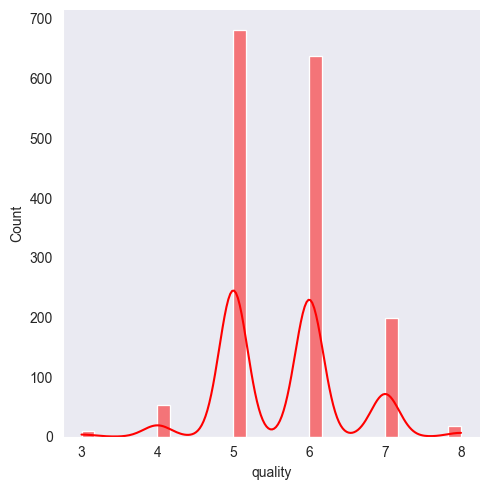

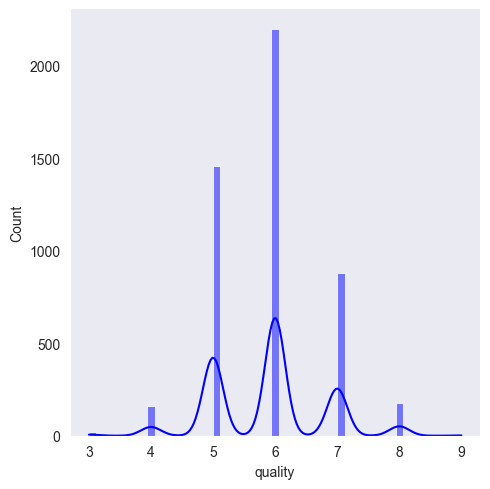

In [89]:
# red wind에대한 밀도 추정(kde)을 적용한 히스토그램
sns.set_style('dark')  #배경색을 검정
sns.displot(red_wine_quality, kde=True, color="red",label='red wine')
sns.displot(white_wine_quality, kde=True, color="blue",label='white wine')
plt.show()

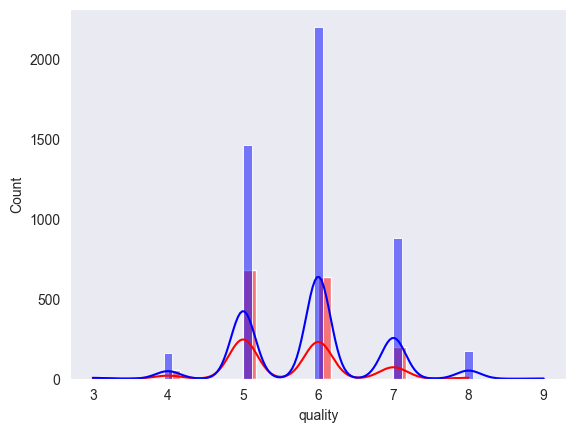

In [90]:
# red wind에대한 밀도 추정(kde)을 적용한 히스토그램
sns.set_style('dark')  #배경색을 검정
sns.histplot(red_wine_quality, kde=True, color="red",label='red wine')
sns.histplot(white_wine_quality, kde=True, color="blue",label='white wine')
plt.show()

In [79]:
# 부분 회귀 플롯으로 시각화
# 독립변수가 2개이상인 경우 - 부분 회귀플랏을 사용해서 하나의 독립변수가 종속변수에 미치는영항을 시각화
import statsmodels.api as sm

eval_env: 1


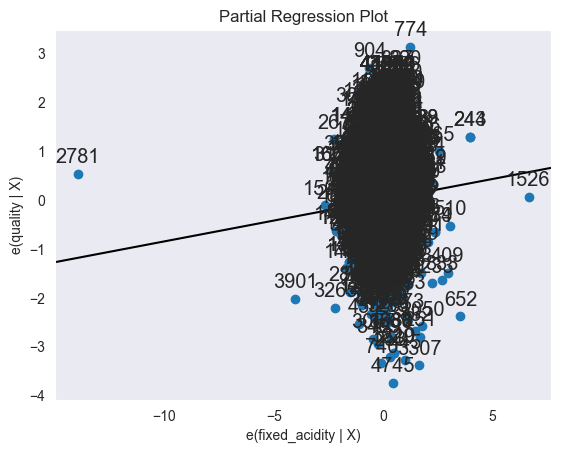

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


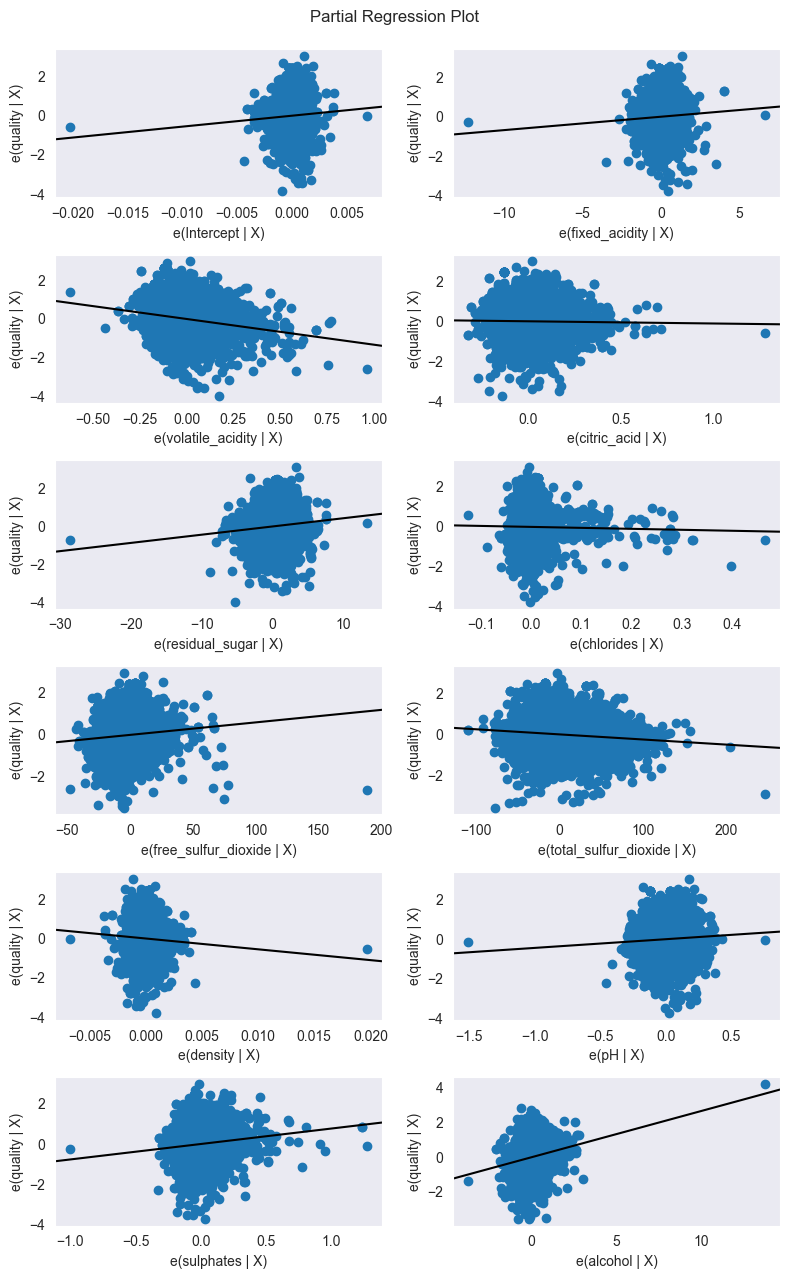

In [84]:
# fixed_acidity
others = list(set(wine.columns).difference(set(['quality','fixed_acidity'])))  # 부분회귀에 사용할 종속 독립변수 제외한 나머지
p,resids =  sm.graphics.plot_partregress('quality','fixed_acidity', others, data = wine, ret_coords=True)
plt.show()  # 부분 회귀의 결과를 시각화

fig = plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')